In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('QS University Ranking 2023.csv')
df.head()

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head()

,rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [ ]:
df.shape

(1422, 21)

In [ ]:
df.isnull().any()

rank             False
institution      False
location code    False
location         False
ar score         False
ar rank          False
er score          True
er rank          False
fsr score         True
fsr rank         False
cpf score         True
cpf rank         False
ifr score         True
ifr rank          True
isr score         True
isr rank          True
irn score         True
irn rank          True
ger score         True
ger rank          True
score scaled     False
dtype: bool

In [ ]:
df2 = df.copy()
df2.drop(columns = ['institution','location','location code','ar rank','er rank','fsr rank','cpf rank','ifr rank','isr rank','irn rank','ger rank','score scaled'], inplace = True)
df2.head()

,rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [ ]:
df2.isnull().sum()

rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

In [ ]:
df2['er score'] = df2['er score'].replace(np.nan, 0)
df2['er score'] = df2['er score'].replace(0,df2['er score'].mean())
df2['er score'] = round(df2['er score'],1)

df2['fsr score'] = df2['fsr score'].replace(np.nan, 0)
df2['fsr score'] = df2['fsr score'].replace(0,df2['fsr score'].mean())
df2['fsr score'] = round(df2['fsr score'],1)

df2['cpf score'] = df2['cpf score'].replace(np.nan, 0)
df2['cpf score'] = df2['cpf score'].replace(0,df2['cpf score'].mean())
df2['cpf score'] = round(df2['cpf score'],1)

df2['ifr score'] = df2['ifr score'].replace(np.nan, 0)
df2['ifr score'] = df2['ifr score'].replace(0,df2['ifr score'].mean())
df2['ifr score'] = round(df2['ifr score'],1)

df2['isr score'] = df2['isr score'].replace(np.nan, 0)
df2['isr score'] = df2['isr score'].replace(0,df2['isr score'].mean())
df2['isr score'] = round(df2['isr score'],1)

df2['irn score'] = df2['irn score'].replace(np.nan, 0)
df2['irn score'] = df2['irn score'].replace(0,df2['irn score'].mean())
df2['irn score'] = round(df2['irn score'],1)

df2['ger score'] = df2['ger score'].replace(np.nan, 0)
df2['ger score'] = df2['ger score'].replace(0,df2['ger score'].mean())
df2['ger score'] = round(df2['ger score'],1)

In [ ]:
df2.isnull().sum()

rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

In [ ]:
df2.head()

,rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [ ]:
df2.describe()

,rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,20.657103,29.997117,24.528903,31.510689,26.503446,49.565823,26.185232
std,410.640354,22.802706,24.019472,28.152374,27.861805,32.976006,30.271530,30.066988,26.090177
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,356.250000,5.400000,4.400000,8.200000,3.100000,5.200000,3.400000,21.900000,6.800000
50%,711.500000,10.800000,10.300000,18.300000,11.300000,16.650000,12.350000,48.900000,15.700000
75%,1066.750000,23.775000,26.950000,43.475000,39.200000,48.975000,38.625000,77.375000,36.300000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


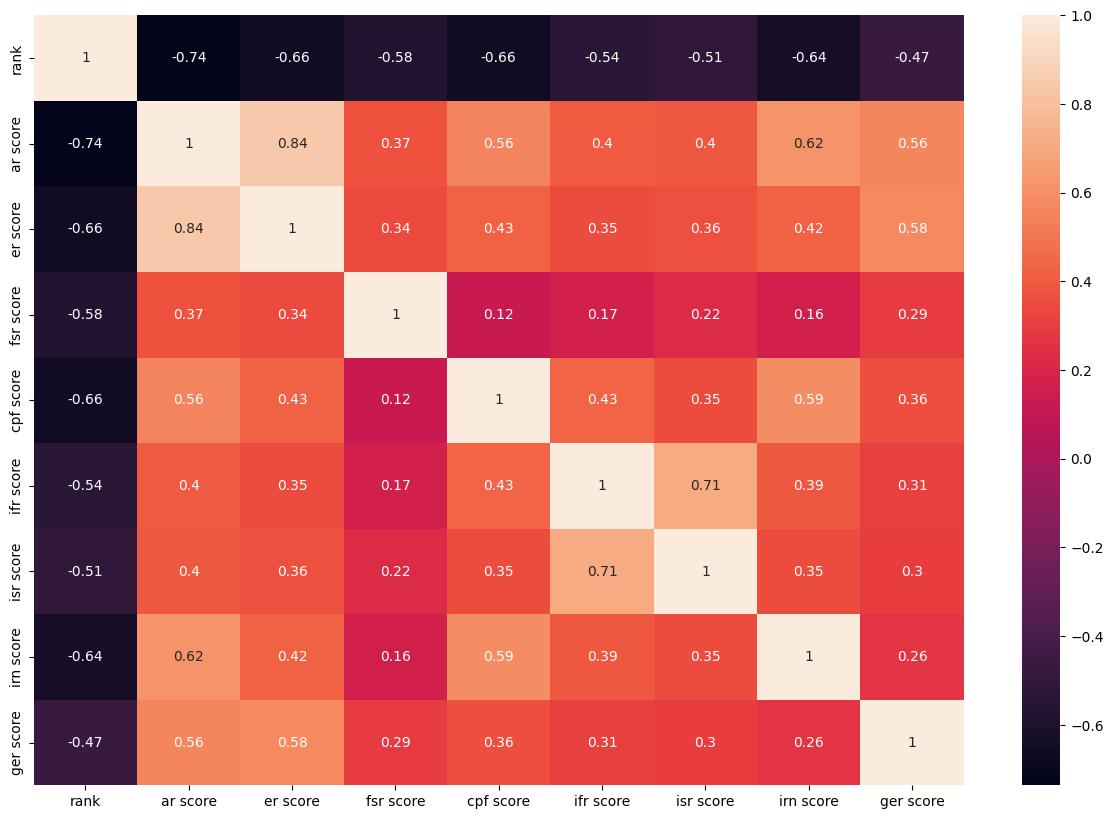

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True);

In [ ]:
# Split the data into training and testing sets
train, test = train_test_split(df2, test_size=0.2, random_state=17)

In [ ]:
# Separate features and target variable for training and testing sets
x_train = train.drop('rank', axis=1)
y_train = train['rank']
x_test = test.drop('rank', axis=1)
y_test = test['rank']

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_score = lr.score(x_test, y_test)
y_pred_lr = lr.predict(x_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r = r2_score(y_test, y_pred_lr)

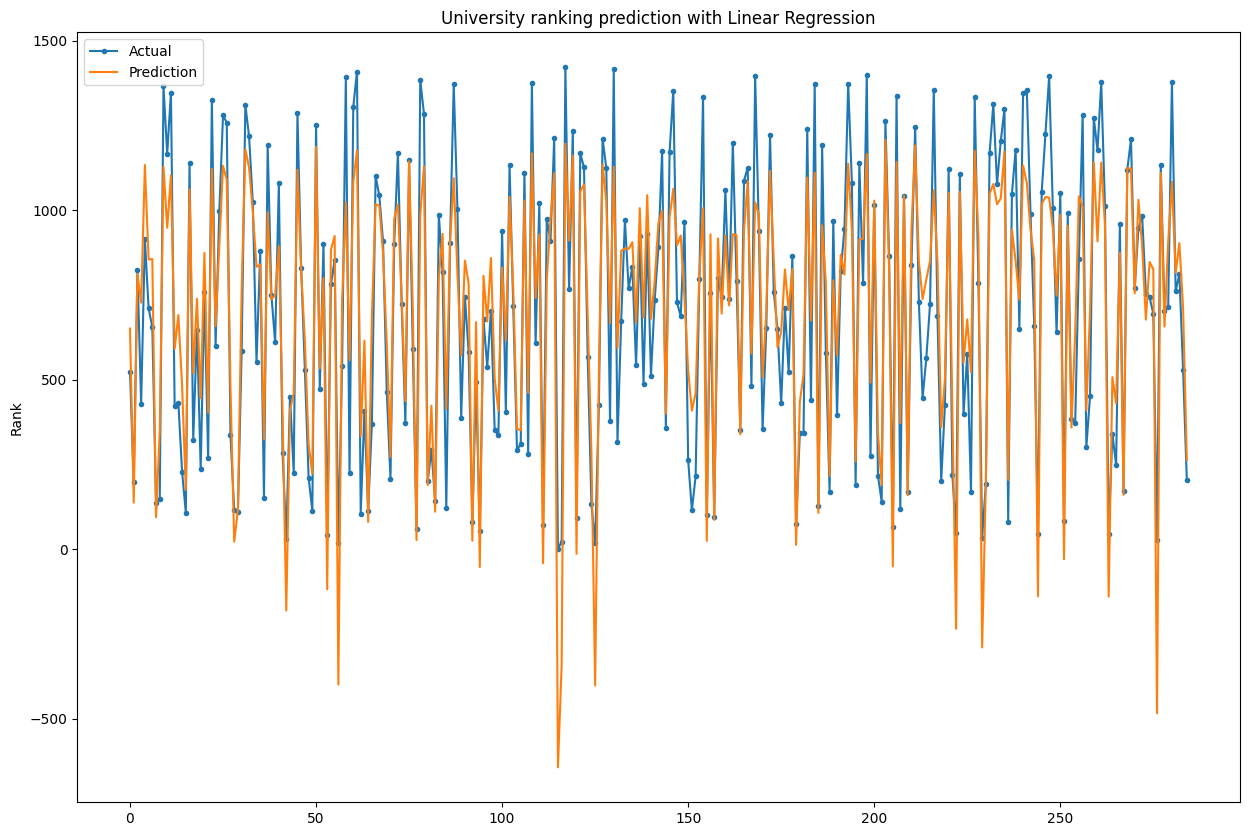

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred_lr, label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_score = dt.score(x_test, y_test)
y_pred_dt = dt.predict(x_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r = r2_score(y_test, y_pred_dt)


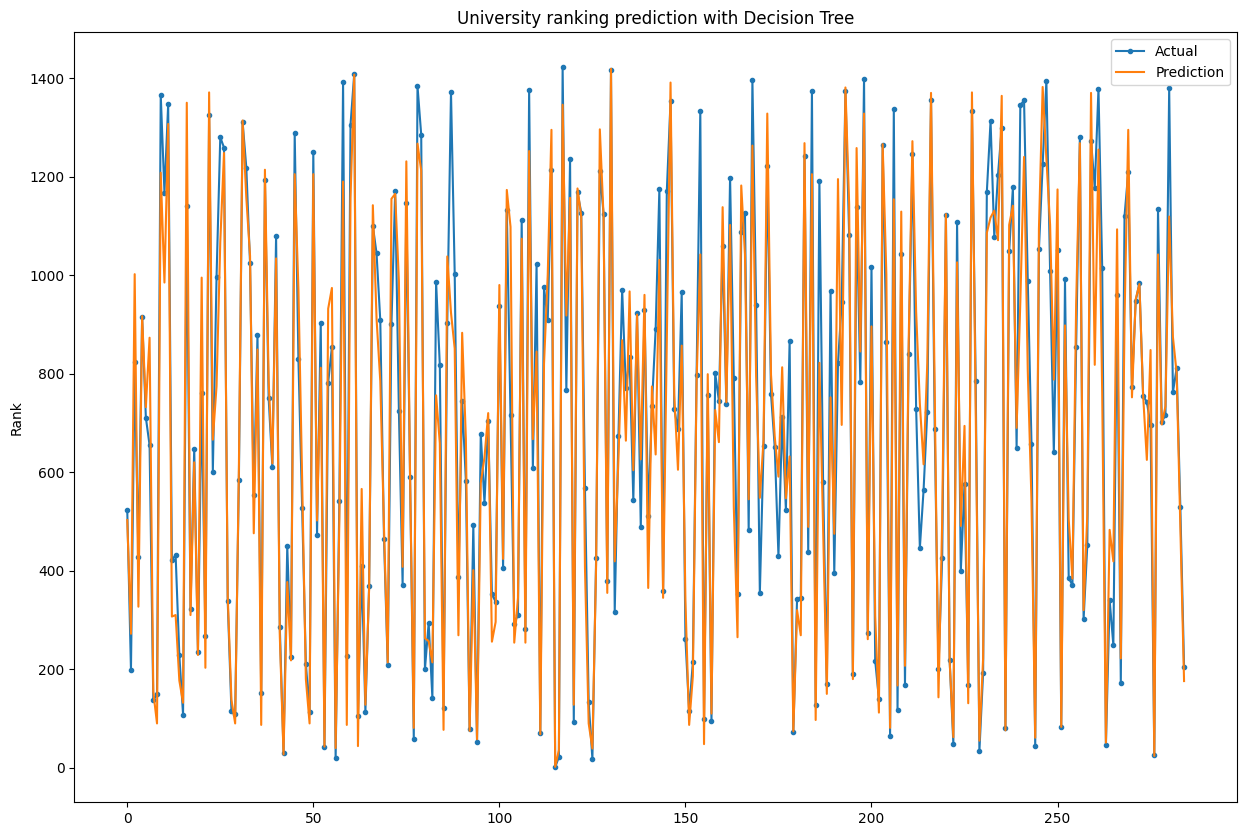

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred_dt, label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
rf_score = rf.score(x_test, y_test)
y_pred_rf = rf.predict(x_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r = r2_score(y_test, y_pred_rf)

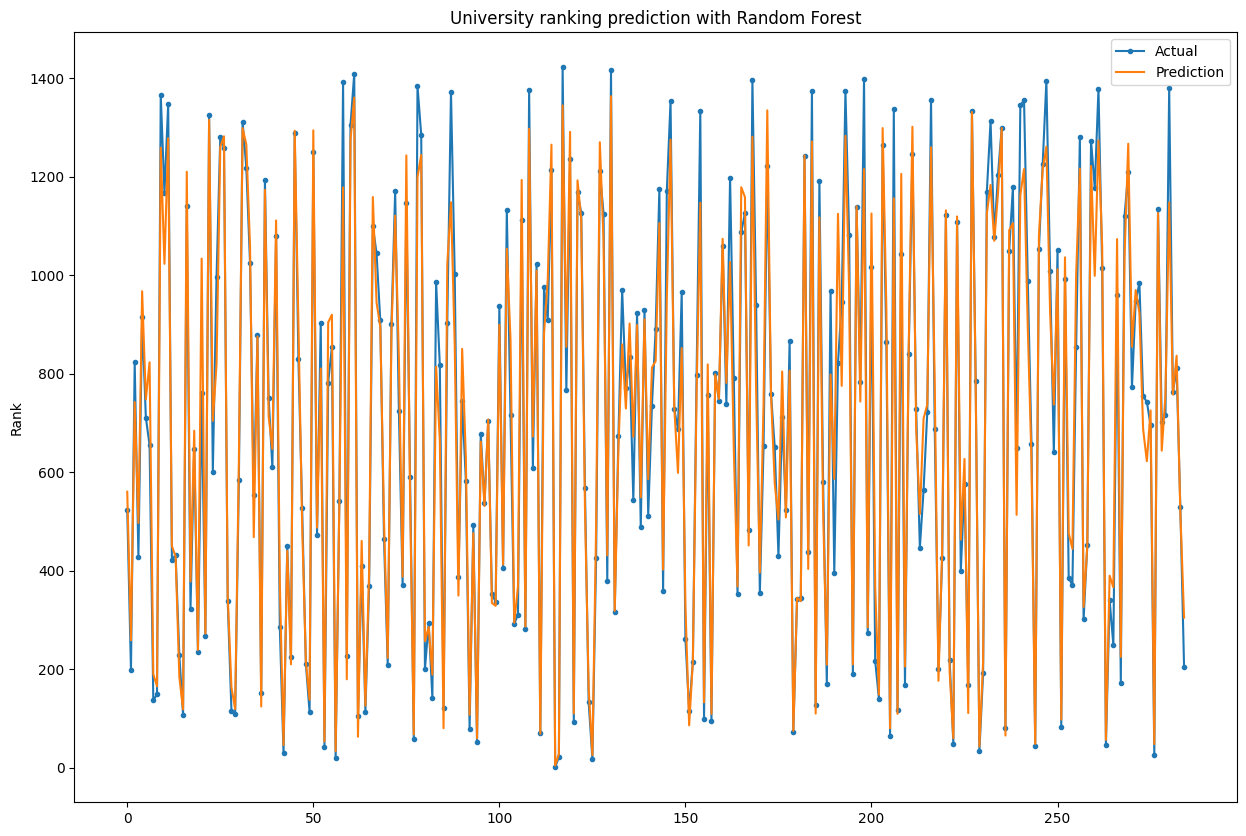

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred_rf, label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with Random Forest')
plt.legend()
plt.show()

In [ ]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test
prediction['Linear Regression'] = y_pred_lr.round(0)
prediction['Decision Tree'] = y_pred_dt.round(0)
prediction['Random Forest'] = y_pred_rf.round(0)


In [ ]:
print('Evaluation Metrics:')
print('='*20)
print('Linear Regression:')
print('Score:', lr_score)
print('Mean Squared Error:', lr_mse)
print('Root Mean Squared Error:', lr_rmse)
print('Mean Absolute Error:', lr_mae)
print('R2 Score:', lr_r)
print('='*20)
print('Decision Tree:')
print('Score:', dt_score)
print('Mean Squared Error:', dt_mse)
print('Root Mean Squared Error:', dt_rmse)
print('Mean Absolute Error:', dt_mae)
print('R2 Score:', dt_r)
print('='*20)
print('Random Forest:')
print('Score:', rf_score)
print('Mean Squared Error:', rf_mse)
print('Root Mean Squared Error:', rf_rmse)
print('Mean Absolute Error:', rf_mae)
print('R2 Score:', rf_r)

Evaluation Metrics:
Linear Regression:
Score: 0.8299839207234502
Mean Squared Error: 30353.031242483332
Root Mean Squared Error: 174.22121352603227
Mean Absolute Error: 144.47887779666078
R2 Score: 0.8299839207234502
Decision Tree:
Score: 0.9238460043030945
Mean Squared Error: 13595.8
Root Mean Squared Error: 116.60102915497787
Mean Absolute Error: 83.67368421052632
R2 Score: 0.9238460043030945
Random Forest:
Score: 0.9641427363034865
Mean Squared Error: 6401.610070538528
Root Mean Squared Error: 80.01006230805302
Mean Absolute Error: 58.62199805586843
R2 Score: 0.9641427363034865


In [ ]:
#Prediction
university_features = {
    'ar score': 75.6,
    'er score': 68.9,
    'fsr score': 82.3,
    'cpf score': 70.5,
    'ifr score': 79.8,
    'isr score': 88.2,
    'irn score': 91.4,
    'ger score': 85.3 # Add the missing feature with its corresponding value
}

# Convert the dictionary to a DataFrame
university_df = pd.DataFrame([university_features])

# Make predictions using the trained Random Forest model
predicted_rank = rf.predict(university_df)

print("Predicted Rank:", predicted_rank[0])


Predicted Rank: 60.484226673326695
